In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.precision", 2)

In [2]:
# Import data
"""
%run data_preprocessing.ipynb
"""
import pickle

with open("x.pickle", "rb") as infile:
    X = pickle.load(infile)
with open("y.pickle", "rb") as infile:
    Y = pickle.load(infile)


In [3]:
X = np.array(X)
Y = np.array(Y).reshape(-1, 1)

In [4]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

Y = Y.reshape(-1)

In [5]:
X = X.reshape(-1, 1, 31)

In [6]:
print(X.shape)
print(X)

(326733, 1, 31)
[[[-0.04902337 -0.81379434 -0.48804119 ... -0.66889387 -0.88002207
   -1.00356476]]

 [[-1.17105755 -1.28143894 -1.25329431 ... -0.88998131 -1.00592082
   -0.60618022]]

 [[-1.00289615 -1.02964456 -1.03448372 ... -1.01647798 -0.60803705
   -0.76769616]]

 ...

 [[ 0.94820727  0.07758371  0.4647032  ...  0.20327205  0.0953197
   -0.50544202]]

 [[ 0.51271236 -0.21756599  0.10256691 ...  0.08999255 -0.5071723
   -0.52778785]]

 [[-0.53290659 -0.94293391 -0.77649745 ... -0.5153608  -0.5295462
   -0.33591943]]]


In [7]:
print(Y.shape)
print(Y)

(326733,)
[-0.77578749 -1.12170878 -0.59848    ... -0.34241789  0.0155942
 -0.14645671]


# Implementation Method of SVR Algorithm

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 31)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [12]:
model.fit(X, Y) # epochs=200, verbose=0)

10211/10211 [==============================] - 17s 2ms/step - loss: 0.1093


In [25]:
# Visualising the Support Vector Regression results
Y_pred = model.predict(X[:100].reshape(-1, 1, 31)) # verbose=0)

Y_true = sc_y.inverse_transform(Y.reshape(1, -1))
Y_pred = sc_y.inverse_transform(Y_pred.reshape(1, -1))

Y_true = Y_true.reshape(-1)
Y_pred = Y_pred.reshape(-1)

4/4 [==============================] - 0s 1ms/step


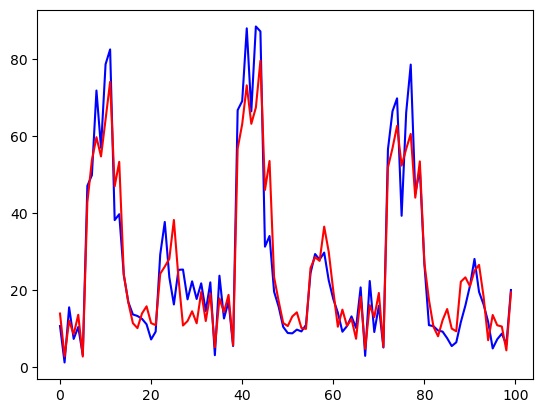

In [26]:
plt.plot(np.arange(len(Y_pred)), Y_true[:len(Y_pred)], color="blue")
plt.plot(np.arange(len(Y_pred)), Y_pred, color="red")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_true[:len(Y_pred)], Y_pred, squared=False)
print(rmse)

7.9582849866182706
